# Welcome to Lab_Plots! 🕵🏻‍♂️ 📊 🕵🏻‍♀️

You may not know this, but the salaries of the employees at the University of Illinois are publicly available! We have curated this data in a nice, structured dataset called `graybook.csv` for you to explore.  The goal of this lab is to work with real UIUC salary data to explore its properties, answer important questions, and to think about the implications of collecting and analyzing this data.  Throughout the lab, it is important to think about being a critical consumer of data who can not only use statistics and programming to analyze data but can also think about the "why" part of data science both in the classroom and in the world. Let’s get started!

In this lab, you will:
- Work with real UIUC salary data to explore some of the statistics that we talked about in lecture: mean, median, standard deviation, etc.
- Practice creating plots to **visualize quantitative data**: boxplots and histograms.
- See how data science can be used in the real world to think about important issues through individual reflection and discussions with your group.


## Your Group

Edit the next Python cell to add information about who you're working within your lab section:

In [123]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = ""
ca1_name = ""
ca2_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# QOTD to Ask Your Group: "Taylor Swift or Harry Styles?"
partner1_name = ""
partner1_netid = ""
partner1_swift_or_styles = ""

partner2_name = ""
partner2_netid = ""
partner2_swift_or_styles = ""

partner3_name = ""
partner3_netid = ""
partner3_swift_or_styles = ""

<hr style="color: #DD3403;">

## Setup: Import the Graybook Dataset

The "Gray Book" is historical term for the book of "Academic and Administrative Appointments".  As a public University, all academic positions (including academic title, tenure status, and salary) are publicly approved by the Board of Trustees.  After approval, they are published publicly at [https://www.bot.uillinois.edu/resources/gray_book](https://www.bot.uillinois.edu/resources/gray_book).

We have parsed the HTML tables and did data cleaning.  The "Graybook Dataset" provided here includes all faculty at The University of Illinois, based on the Sept. 2021 Graybook report.  A CSV version of this dataset is available at the following URL:

```
https://waf.cs.illinois.edu/discovery/graybook.csv
```

You know what to do to import the libraries and read in the data! 😃

In [124]:
# Import the graybook dataset below:
import pandas as pd
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/graybook.csv")

<hr style="color: #DD3403;">

## Part 1. Exploratory Data Analysis (EDA)

As we discussed in lecture, the first step of any data analysis is to get familiar with your dataset.  Think about what this data can tell you and what variables are included.  Data scientists always start with this step.

Let’s do some overall exploratory data analysis to get some baseline data to compare to.  Before you do the calculations, guess what you think the average salary of ALL faculty is at UIUC. Enter your answer below.  

**Guess for Overall Average Salary of UIUC Faculty**: 180,000

## Puzzle 1.1: Descriptive Statistics

Next, using all of the data, find the following information:

1. the number of faculty at UIUC
2. the mean present salary
3. the median present salary
4. the standard deviation for present salary

In [125]:
university_num_emp = len(df)

In [126]:
university_mean_sal = df["Present Salary"].mean()

In [127]:
university_median_sal = df["Present Salary"].median()

In [128]:
university_std_sal = df["Present Salary"].std()

### 🔬 Test Case Checkpoint 🔬

In [129]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
x = university_num_emp + university_mean_sal + university_median_sal + university_std_sal
y = ((university_mean_sal - university_median_sal) * university_std_sal) / university_num_emp

assert( abs(x - 281282.487472532) < 0.01 ), "Hmm...It looks like your calculations are off?"
assert( abs(y - 180878.70632722884) < 0.01 ), "Hmm...It looks like your calculations are off?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Visual Displays of Data -- A Key Part of EDA!

Now, we are a bit more familiar with the dataset and some summary statistics. Looking at overall descriptive statistics helps us summarize all of the observations in a column, rather than having to scroll through all of the observations!  However, descriptive statistics alone often don’t tell the whole story. This is where having tools for visualizing statistics comes in handy.

## Puzzle 1.2: Histograms

Let’s start by looking at one of the most simple, yet powerful visual displays of data, a histogram.  Histograms are used to show the overall shape of the data and they allow us to see frequencies.  Create a frequency histogram of the present salaries at UIUC.


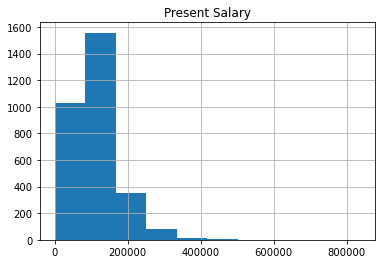

In [130]:
# Create your histogram here:

hist = df.hist(column = "Present Salary")

## Puzzle 1.3: Boxplots

Next, let’s look at another simple, yet power visualization: a boxplot! Create a boxplot of the overall salary data at UIUC. 

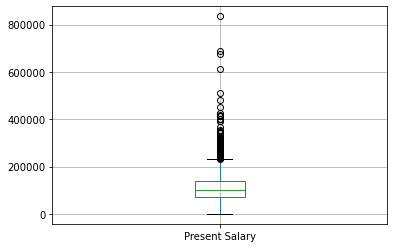

In [131]:
# Create your boxplot here:
boxplot = df.boxplot(column = "Present Salary")

**❓Group Discussion ❓**

Discuss with your group whether you think a histogram or a boxplot or both best visualize the salary data.  There is no right answer to this question.  Explain why histograms, boxplots, or both are important and what they can tell us about the data.  

**❓Individual Reflection ❓**
Why is it valuable to look at visual displays of salary data in general (as opposed to just looking at descriptive statistics like the mean and SD)? Write at least three complete sentences.

The histogram because it shows the data better.

It shows you the full distance between different salaries. If looking at the numbers, you can see that they are rather similar throughout, but once you plot it you can see the differences better. Also, outliers are very crazy to be seen in visual representation opposed to just looking at it.

<hr style="color: #DD3403;">

## Part 2. Department-Level Data

One of the interesting properties of the salary dataset is that you can see what department each professor is from and look at the same data at a department level.  In other words, you can calculate descriptive statistics and look at visual displays of data for each department.  Let’s explore whether or not there are salary discrepancies among a few departments.

## Puzzle 2.1

There was a certain function you learned that will help you **group** all of the people in each department so you can find departmental aggregates.  In other words, you want to group by `'Department Name'`.

Next, instead of just grouping salary by a single aggregate, use **Python list syntax** to aggregate by `count`, `mean`, and `median` to find the mean and median salary, as well as the count for how many people are in each department.

To make things easier to read, modify your DataFrame to include only the `Department Name` and `Present Salary` fields before you groupby.  Remember, when you use `agg`, provide a list of `count`, `mean`, and `median` to aggregate on all three statistics simultaneously instead of just one like what we've done so far!

In [132]:
# Create a second DataFrame containing only "Department Name" and "Present Salary":
df2 = df[["Department Name", "Present Salary"]]
df2

,Department Name,Present Salary
0,Agr & Consumer Economics,198300.00
1,Ag Ldrshp Educ Comm Program,76500.00
2,Ag Ldrshp Educ Comm Program,78030.00
3,Ag Ldrshp Educ Comm Program,90000.00
4,Ag Ldrshp Educ Comm Program,78000.00
...,...,...
3039,Vet Clinical Medicine,128784.01
3040,Vet Clinical Medicine,188056.00
3041,Vet Clinical Medicine,166560.65
3042,Veterinary Teaching Hospital,93000.00


In [133]:
# Create our group:
agg_df = df2.groupby("Department Name").agg(["count", "mean", "median"]).reset_index()
agg_df

Department Name Present Salary                           
                                            count           mean      median
0        ACES Info Tech & Cmc Svcs            323   14622.116192       0.000
1                      Accountancy             62  208067.641290  223686.000
2                  Action Learning              1  130250.000000  130250.000
3                      Advertising             23  101649.899130   96529.420
4            Aerospace Engineering             24  125896.208333  113724.500
..                             ...            ...            ...         ...
158          Vet Clinical Medicine             54  130757.009074  128438.405
159  Vet Med College-Wide Programs              1   89760.000000   89760.000
160    Vet Medicine Administration              2  251830.170000  251830.170
161      Veterinary Diagnostic Lab             19  130391.656842  123772.490
162   Veterinary Teaching Hospital              8  134015.693750  119500.000

[163 rows x 4 columns]

In [134]:
# Display 10 random rows to make sure it works:
agg_df.sample(10)

Department Name Present Salary                           
                                             count           mean      median
5          African American Studies             10  112964.474000  109422.315
128                         Physics             65  137021.023692  131179.080
22        Big Ten Academic Alliance              1  234090.000000  234090.000
131  Prg in Jewish Culture &Society              1   56375.000000   56375.000
63                  Family Medicine              1   15376.500000   15376.500
70   Geography & Geographic InfoSci             12   95996.960000   83413.070
39           College of Media Admin              1  247500.000000  247500.000
10   Agricultural & Biological Engr             23  109370.936957   92986.490
68               French and Italian             12   80122.228333   79172.500
50                            Dance             13   81334.538462   87875.000

### 🔬 Test Case Checkpoint 🔬

In [135]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(agg_df) == 163 ), "You should have 154 different departments.  Check to make sure you grouped the data?"
assert( "Present Salary" in agg_df ), "You must have a salary output"
assert( "mean" in agg_df["Present Salary"] ), "Make sure you have a mean in your salary"
assert( "count" in agg_df["Present Salary"] ), "Make sure you have a count in your salary"
assert( "median" in agg_df["Present Salary"] ), "Make sure you have a median in your salary"
assert( len(agg_df.columns) == 4 ), "Make sure you have ONLY the salary data and the department"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.2

Let’s look at 3 different departments: The Department of English, The Department of Psychology, and The Department of Electrical & Computer Eng.  Find the mean salary for each of these departments.  We'll do the means first!

In [136]:
mean_English = df2[df2["Department Name"] == "English"]["Present Salary"].mean()
mean_English

76303.20137931037

In [137]:
mean_Psych = df2[df2["Department Name"] == "Psychology"]["Present Salary"].mean()
mean_Psych

111859.07629629633

In [138]:
mean_ECE = df2[df2["Department Name"] == "Electrical & Computer Eng"]["Present Salary"].mean()
mean_ECE

142690.60805555555

### 🔬 Test Case Checkpoint 🔬

In [139]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
x = mean_English + mean_Psych + mean_ECE

assert( x > 330852.8850 ), "It looks like your calculations are off?"
assert( x < 330852.8860 ), "It looks like your calculations are off?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.3

Find the **median** salaries of the following departments: The Department of English, The Department of Psychology, and The Department of Electrical & Computer Eng.  

In [140]:
median_English = df2[df2["Department Name"] == "English"]["Present Salary"].median()
median_English

62424.0

In [141]:
median_Psych = df2[df2["Department Name"] == "Psychology"]["Present Salary"].median()
median_Psych

102121.44

In [142]:
median_ECE = df2[df2["Department Name"] == "Electrical & Computer Eng"]["Present Salary"].median()
median_ECE

132027.5

### 🔬 Test Case Checkpoint 🔬

In [143]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
y = median_English + median_Psych + median_ECE

assert( y < 296572.95 ), "It looks like your calculations are off?"
assert( y > 296572.93 ), "It looks like your calculations are off?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


**❓ Individual Reflection❓**

Are the means and medians drastically different from each other in each department and between each of the 3 departments? Think about why or why not. Are there any confounding variables that could be driving these differences?  Write at least 3 sentences below.  

Yes, they are all about 30,000 away from eachother. I believe it is because of the requirements for those specific positions. Basically saying english is paid less because engineering is much harder and requires more out of the professors

## Puzzle 2.4

Create a histogram of the present salaries in your home department.  In other words, if your major is Statistics, you should have a histogram of all the salaries in the Statistics Department. Also, find the maximum and minimum salary in your home department. If you're undecided, pick a department you are interested in.

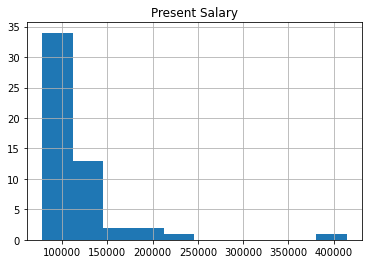

In [146]:
# histogram of your home department
df_IS = df2[df2["Department Name"] == "Information Sciences"]
ISHISt = df_IS.hist(column = "Present Salary")

In [153]:
#find the max and min salary for your home department
max = df_IS["Present Salary"].max()
min = df_IS["Present Salary"].min()
print(max)
print(min)

414167.0
78000.0


**❓ Group Discussion ❓**

Share the results with the people at your table. Do you notice any similarities or differences between departments?

**❓ Individual Reflection ❓**
Write down something you learned from your group discussion! Write at least 3 sentences.

I learned that each department has very different mins and max salaries. One group member in Statistics and his max was much lower than in IS. The same goes for the min, it was much much lower than the min in IS. Shows you how different each department gets paid.

<hr style="color: #DD3403;">

## 3. Genders and Salaries

Data can often reveal systemic problems or discrimination. For example, in many companies, men and women are promoted at different rates.  Let’s look at a subset of the salary dataset to investigate whether or not there is a difference in salaries between faculty who identify as men and women in two departments. We have this data for the STAT and CS departments (Karle and Wade’s home departments) and have compiled it in a dataset called `STAT_CS_gender.csv`. This data is also located in the same directory as this lab!

## Puzzle 3.1
Import that `STAT_CS_gender.csv` and store it in a variable called `statcs_df` and display it to see what it looks like!

In [155]:
# Load the dataset and display it:
statcs_df = pd.read_csv("STAT_CS_gender.csv")
statcs_df

,Employee Name,Gender,Job Title,Tenure,Empl Class,Present FTE,Proposed FTE,Present Salary,Proposed Salary,College Code,College Name,Department Code,Department Name
0,"Al-Hassanieh, Haitham",M,ASST PROF,NaN,AB,0.0,0.0,0.0,0.0,KP,Grainger Engineering,434,Computer Science
1,"Amato, Nancy Marie",F,PROF,A,AA,1.0,1.0,250000.0,275000.0,KP,Grainger Engineering,434,Computer Science
2,"Anastasio, Mark A",M,PROF,NaN,AA,0.0,0.0,0.0,0.0,KP,Grainger Engineering,434,Computer Science
3,"Bailey, Michael Donald",M,PROF,NaN,AA,0.0,0.0,0.0,0.0,KP,Grainger Engineering,434,Computer Science
4,"Banerjee, Arindam",M,PROF,A,AA,1.0,1.0,173000.0,176460.0,KP,Grainger Engineering,434,Computer Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,"Warnow, Tandy",F,PROF,NaN,AA,0.0,0.0,0.0,0.0,KV,Liberal Arts & Sciences,583,Statistics
223,"Yang, Yun",M,ASST PROF,P,AA,1.0,1.0,104500.0,106590.0,KV,Liberal Arts & Sciences,583,Statistics
224,"Zhai, Chengxiang",M,PROF,NaN,AA,0.0,0.0,0.0,0.0,KV,Liberal Arts & Sciences,583,Statistics
225,"Zhao, Sihai Dave",M,ASSOC PROF,A,AA,1.0,1.0,113800.0,119300.0,KV,Liberal Arts & Sciences,583,Statistics


## Puzzle 3.2
Create two boxplots of the Present Salaries for male and female in dataset `statcs_df`.  In your boxplots, make sure the **only box** is the present salary.  

<AxesSubplot:>

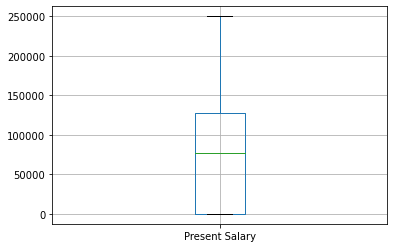

In [158]:
# Create a boxplot of the present salaries of female faculty:
statcs_df[statcs_df["Gender"] == "F"].boxplot(column = "Present Salary")

<AxesSubplot:>

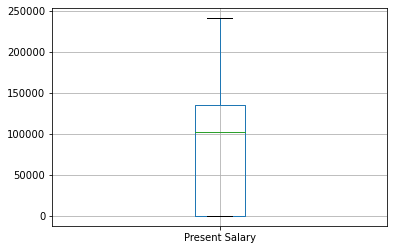

In [159]:
# Create a boxplot of the present salaries of male faculty:
statcs_df[statcs_df["Gender"] == "M"].boxplot(column = "Present Salary")

## Puzzle 3.3

Next, calculate the overall mean, median, and SD of the salaries for the data in `statcs_df`.

In [160]:
overall_mean = statcs_df["Present Salary"].mean()
overall_mean

81978.23810572688

In [161]:
overall_median = statcs_df["Present Salary"].median()
overall_median

100000.0

In [162]:
overall_SD = statcs_df["Present Salary"].std()
overall_SD

73067.39110214952

### 🔬 Test Case Checkpoint 🔬

In [163]:
## == TEST CASES for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
x = overall_median + overall_median + overall_SD
y = ((overall_mean - overall_median) * overall_SD) / overall_SD

assert( abs(x - 273067.39110214956) < 0.1 ), "It looks like your calculations are off?"
assert( abs(y + 18021.76189427312) < 0.1 ), "It looks like your calculations are off?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## 4. Exploring Your Own Interests


At this point of the lab, we have investigated a lot of questions, however, these have been questions that we have told you to answer. As a data scientist, it is important to be able to use the data science skills that you learn in the classroom to answer real questions that you have.  

 **❓ Individual Reflections ❓**

Think about two questions that you have that have not been answered. Record them below.  Then, answer at least one of these questions using Python and either dataset.  

**Unanswered Question 1:** What Gender is the most paid person in CS
**Unanswered Question 2:** What job title do they have


In [169]:
# Answer a question that you have using Python in this cell- it can be something simple!
print(statcs_df.nlargest(1, "Present Salary"))
print("Gender = F     Job= Prof")

        Employee Name Gender Job Title Tenure Empl Class  Present FTE  \
1  Amato, Nancy Marie      F      PROF      A         AA          1.0   

   Proposed FTE  Present Salary  Proposed Salary College Code  \
1           1.0        250000.0         275000.0           KP   

           College Name  Department Code   Department Name  
1  Grainger Engineering              434  Computer Science  
Gender = F     Job= Prof


**❓ Group Discussion ❓**

Share your question and results with your group. 

<hr style="color: #DD3403;">

## 5. Beyond Stat 107

As a data scientist, it is important to think about the implications of collecting and not collecting certain data.  Data that is **not** collected in an analysis is called *counter data*.  

Many times, data is collected to make a profit.  Data has even been referred to as “the new oil” because it is oftentimes seen as an uncapped natural resource and if you can figure out how to capture and refine it, it can lead to a massive profit.

It’s also important to think about who data analysis can benefit and who it can harm.  It’s also important to think about why the data is collected and why counter data is not collected.  


**❓ Last Individual Reflection ❓**
Write a paragraph style response (at least 5 complete sentences) summarizing what you learned from working with the salary data from this lab. We have listed a few questions below to give you some ideas on what to write about if you need them.

- What is some counter data that you’d like to collect in regard to salaries? Why do you think it’s important to collect this data?  
- Who benefits from collecting this salary data?  Who does this data harm?
- Why do you think this salary data is public? Can you think of any reasons that this could be problematic? 
- What did you learn from looking at the salaries stratified by gender?

This data showed me how much my professors really make. I am very surprised how much some professors make and question if they deserve to be paid that much. I know in the past I have used these data things to see how much my high school teachers made, and surprised me that the worst teacher always made the most. This data harms the staff as they find out some of their colleagues make more or less than them so they can get mad and go on strike. This data is public probably because it is needed to be known even if it hurts people. That the male gender makes a bit more than the females.

<hr style="color: #DD3403;">

## **Submission** 


You're almost done! All you need to do is to commit your lab to GitHub:

1. Make certain to save your work. To do this, go to **File => Save All**

2. After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)